<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

In [ ]:
from matplotlib import pyplot as plt

max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.show()

### 1.2 An overflowing bucket

In [ ]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.show()

In [ ]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()
plt.show()

### 1.3 A leaky bucket

In [ ]:
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.show()

### 1.4 Let’s turn off the tap

In [ ]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.show()

### Using while

In [ ]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt       # Need to remember to increment the counter which affects the while condition after each iteration      

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.show()

### 1.5 A quick summary

The general steps required for using programming to model real-world scenarios are:

1. Establish a relationship that connects the changes of the variables
2. Pick a starting value
3. Take a step, and calculate the changes.
4. Update the variables
5. Keep on going until you have the desired number of points.
6. If you want to improve accuracy, take smaller steps.

### 1.6 We just solved a differential equation!

The above problem can be described in a mathematical equation. A differential equation! Where the rate of change of the volume is equals to a constant value.

## 2 Simulating Radioactivity

### 2.1 Introduction

The decay of radioactive material (i.e. the rate of change of the radioactive nuclei) is equal to the number of radioactive nuclei times the negative value of the decay constant

### 2.2 Approximating the differential equation

Change in the number of radioactive nuclei is equal to the number of radioactive nuclei times the negative value of the decay constant times the change in time.

### 2.3 Getting a feel

I think it's alright

### 2.4 Let’s write some code

In [ ]:
decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')
plt.show()

### 2.5 Some things to note about the code

Using a while loop allows us to continue the loop constantly until we decide it is time to stop. In this case, we define the stop point as the stop fraction which is when the number of radioactive nuclei is reduced to a negligible amount.

### 2.6 A quick summary

Again, the method of modelling radioactive decay follows the same process:

1. Establish a relationship that connects the changes of the variables
2. Pick a starting value
3. Take a step, and calculate the changes.
4. Update the variables
5. Keep on going until you have the desired number of points.
6. If you want to improve accuracy, take smaller steps.

## Exercise 1 :  A more realistic leak

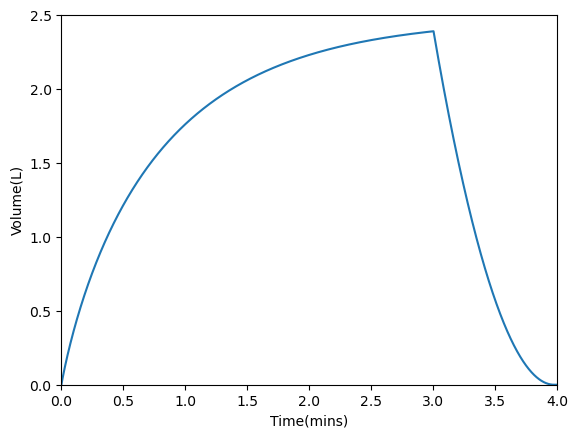

In [6]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)

# leak_rate = ((2*9.8*h)**1/2)                 # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

def leak_rate(volume):
    volume_in_m3 = volume/1000
    base_of_bucket = 0.07           # base of bucket in m2
    h = volume_in_m3/base_of_bucket        # height of the water in m
    speed_of_water_ms = (2*9.8*h)**(1/2)  # in m/s
    
    area_of_leak = 1/10000         # area of leak in m2
    return (speed_of_water_ms * area_of_leak)*60000    # leak rate in L/min (converted from m3/s in the brackets)

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate(volume) * dt
    volume -= leak_volume
    
    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV  
    if volume < 0:
        volume = 0

    time += dt             

plt.plot(all_time, all_volume)
plt.ylim([0, 2.5])
plt.xlim([0, 4])
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.show()